In [111]:
# Importando as bibliotecas necessárias
from pandas import read_csv
from matplotlib import pyplot as plt
from re import findall

In [2]:
# Declarando constantes do Notebook
_DATASET_NAME = "movie_dataset.csv"

In [72]:
# Lendo o dataset de filmes do IMDB
df_movies = read_csv(_DATASET_NAME, encoding="utf-8")
df_movies.head()

,title,id,runtime,genre,ratings,director,cast,Description,released_year,movie_link
0,Coyote Ugly,tt0200550,100 min,"['Comedy', 'Drama', 'Music']",5.7,['David McNally'],"['PiperPerabo', 'AdamGarcia', 'JohnGoodman', '...","Aspiring songwriter Violet Sanford, after gett...",2000.0,https://www.imdb.com/title/tt0200550/
1,American Psycho,tt0144084,102 min,"['Crime', 'Drama', 'Horror']",7.6,['Mary Harron'],"['ChristianBale', 'JustinTheroux', 'JoshLucas'...",A wealthy New York City investment banking exe...,2000.0,https://www.imdb.com/title/tt0144084/
2,Gladiator,tt0172495,155 min,"['Action', 'Adventure', 'Drama']",8.5,['Ridley Scott'],"['RussellCrowe', 'JoaquinPhoenix', 'ConnieNiel...",A former Roman General sets out to exact venge...,2000.0,https://www.imdb.com/title/tt0172495/
3,Requiem for a Dream,tt0180093,102 min,['Drama'],8.3,['Darren Aronofsky'],"['EllenBurstyn', 'JaredLeto', 'JenniferConnell...",The drug-induced utopias of four Coney Island ...,2000.0,https://www.imdb.com/title/tt0180093/
4,Scary Movie,tt0175142,88 min,['Comedy'],6.2,['Keenen Ivory Wayans'],"['AnnaFaris', 'JonAbrahams', 'MarlonWayans', '...",A year after disposing of the body of a man th...,2000.0,https://www.imdb.com/title/tt0175142/


In [73]:
# Removendo as colunas desnecessárias para as análises
df_movies.drop(["id", "Description", "movie_link"], axis=1, inplace=True)
df_movies.head()

,title,runtime,genre,ratings,director,cast,released_year
0,Coyote Ugly,100 min,"['Comedy', 'Drama', 'Music']",5.7,['David McNally'],"['PiperPerabo', 'AdamGarcia', 'JohnGoodman', '...",2000.0
1,American Psycho,102 min,"['Crime', 'Drama', 'Horror']",7.6,['Mary Harron'],"['ChristianBale', 'JustinTheroux', 'JoshLucas'...",2000.0
2,Gladiator,155 min,"['Action', 'Adventure', 'Drama']",8.5,['Ridley Scott'],"['RussellCrowe', 'JoaquinPhoenix', 'ConnieNiel...",2000.0
3,Requiem for a Dream,102 min,['Drama'],8.3,['Darren Aronofsky'],"['EllenBurstyn', 'JaredLeto', 'JenniferConnell...",2000.0
4,Scary Movie,88 min,['Comedy'],6.2,['Keenen Ivory Wayans'],"['AnnaFaris', 'JonAbrahams', 'MarlonWayans', '...",2000.0


In [74]:
# Verificando dados da coluna runtime para verificar se é apenas minutos
arr_minutos = df_movies.runtime.unique()
print(arr_minutos)
print(f"Total de valores distintos: {len(arr_minutos)}")

['100 min' '102 min' '155 min' '88 min' '113 min' '104 min' '108 min'
 '122 min' '123 min' '109 min' '165 min' '98 min' '143 min' '119 min'
 '93 min' '95 min' '120 min' '89 min' '116 min' '131 min' '78 min'
 '107 min' '130 min' '106 min' '91 min' '94 min' '112 min' '103 min'
 '118 min' '147 min' '90 min' '121 min' '110 min' '114 min' '127 min'
 '84 min' '82 min' '154 min' '83 min' '115 min' '124 min' '129 min'
 '140 min' '99 min' '77 min' '125 min' '145 min' '128 min' '136 min'
 '97 min' '126 min' '173 min' '101 min' '133 min' '85 min' '87 min'
 '111 min' '92 min' '96 min' '105 min' '135 min' '51 min' '117 min'
 '186 min' '86 min' '216 min' '132 min' '79 min' '80 min' '81 min'
 '156 min' '139 min' '162 min' '76 min' '48 min' '172 min' '166 min'
 '163 min' '169 min' '170 min' '217 min' '73 min' '72 min' '151 min'
 '74 min' '60 min' '197 min' '160 min' '158 min' '142 min' '176 min'
 '75 min' '67 min' '180 min' '207 min' '167 min' '134 min' '159 min'
 '161 min' '175 min' '54 min' '150 min

In [75]:

# Verificando os tipos de variáveis na coluna de runtime que foi transformada em array
types = []
for min in arr_minutos:
    if type(min) not in types:
        types.append(type(min))

print(types)

[<class 'str'>, <class 'float'>]


In [76]:
# Verificando que todas os valores em string contém a métrica apos os minutos
tempo = []
count_tempo = 0
floats = []
count_floats = 0
for min in arr_minutos:
    if type(min) == str:
        count_tempo += 1
        if min.split()[1] not in tempo:
            tempo.append(min.split()[1])
    else:
        count_floats += 1
        if min not in floats:
            floats.append(min)

print(tempo)
print(count_tempo)
print(floats)
print(count_floats)

['min']
249
[nan]
1


In [88]:
# Criando a função para aplicar no dataframe
def convert_runtime(row_value):
    if type(row_value) == str:
        value_number = row_value.split()[0]
        getting_all_digits_with_regex = findall(r'\d+', str(value_number))
        return int("".join(getting_all_digits_with_regex))
    else:
        return 0

In [89]:
# Verificando o valor 1,440
df_movies[df_movies["runtime"] == "1,440 min"]

,title,runtime,genre,ratings,director,cast,released_year
31145,The Clock,"1,440 min",['Drama'],9.0,['Christian Marclay'],"['RosannaArquette', 'BetteDavis', 'LeonardoDiC...",2010.0


In [90]:
# Aplicando a função na coluna runtime
df_movies["runtime"] = df_movies["runtime"].apply(convert_runtime)
# Renomeando a coluna para fazer sentido com a informação de minutos
df_movies = df_movies.rename(columns={"runtime": "runtime_minutes"})
df_movies.head()

,title,runtime_minutes,genre,ratings,director,cast,released_year
0,Coyote Ugly,100,"['Comedy', 'Drama', 'Music']",5.7,['David McNally'],"['PiperPerabo', 'AdamGarcia', 'JohnGoodman', '...",2000.0
1,American Psycho,102,"['Crime', 'Drama', 'Horror']",7.6,['Mary Harron'],"['ChristianBale', 'JustinTheroux', 'JoshLucas'...",2000.0
2,Gladiator,155,"['Action', 'Adventure', 'Drama']",8.5,['Ridley Scott'],"['RussellCrowe', 'JoaquinPhoenix', 'ConnieNiel...",2000.0
3,Requiem for a Dream,102,['Drama'],8.3,['Darren Aronofsky'],"['EllenBurstyn', 'JaredLeto', 'JenniferConnell...",2000.0
4,Scary Movie,88,['Comedy'],6.2,['Keenen Ivory Wayans'],"['AnnaFaris', 'JonAbrahams', 'MarlonWayans', '...",2000.0


In [91]:
# Verificando os tipos das colunas
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100047 entries, 0 to 100046
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   title            100047 non-null  object 
 1   runtime_minutes  100047 non-null  int64  
 2   genre            100046 non-null  object 
 3   ratings          100046 non-null  float64
 4   director         100046 non-null  object 
 5   cast             100046 non-null  object 
 6   released_year    100046 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.3+ MB


In [103]:
# Criando um dataframe e visualizando-o com filmes nota 10
df_movies_10 = df_movies[df_movies["ratings"] == 10]
df_movies_10.sort_values(by="runtime_minutes", ascending=False)

,title,runtime_minutes,genre,ratings,director,cast,released_year
99856,Atrabilious,130,"['Comedy', 'Horror', 'Thriller']",10.0,['William Atticus Parker'],"['LeonAddisonBrown', 'MarkBooneJunior', 'Brook...",2022.0
42507,The Floating Man,114,['Drama'],10.0,['Syed Jobair Ahmed'],"['KhurshedAhammad', 'AnirbanAnirban', 'BristyB...",2012.0
92422,A Better Life,92,['Drama'],10.0,['Mainak Paul'],"['SupriyoDutta', 'ArunBannerjee', 'MayurPaul']",2020.0
76426,Be Somebody,90,"['Action', 'Crime']",10.0,['Don Overton'],"['CiscoReyes', 'HarleyWallen', 'ConnieKincer',...",2018.0
100027,"Jenga, cudna igra",90,['Comedy'],10.0,['Nikola Koncarevic'],"['MilosMacura', 'NevenaNerandzic', 'DimitrijeA...",2022.0
97627,Til Death Do Us Part Journey to the Cross,86,['Drama'],10.0,['Darius Burton'],"['JackieVanderpool', 'StevenBlack', 'MichaelWi...",2021.0
87527,Lohem Baneshama,80,['Drama'],10.0,['Yoav Ronen'],"['NoyitAv', 'RoiElla', 'EranIvanir', 'HadasKal...",2019.0


In [106]:
# Criando um dataframe com os valores ordenados Ratings Descendente e Released_Year Ascendente
df_movies_top = df_movies.sort_values(by=["ratings", "released_year"], ascending=[False, True])
df_movies_top.head(10)

,title,runtime_minutes,genre,ratings,director,cast,released_year
42507,The Floating Man,114,['Drama'],10.0,['Syed Jobair Ahmed'],"['KhurshedAhammad', 'AnirbanAnirban', 'BristyB...",2012.0
76426,Be Somebody,90,"['Action', 'Crime']",10.0,['Don Overton'],"['CiscoReyes', 'HarleyWallen', 'ConnieKincer',...",2018.0
87527,Lohem Baneshama,80,['Drama'],10.0,['Yoav Ronen'],"['NoyitAv', 'RoiElla', 'EranIvanir', 'HadasKal...",2019.0
92422,A Better Life,92,['Drama'],10.0,['Mainak Paul'],"['SupriyoDutta', 'ArunBannerjee', 'MayurPaul']",2020.0
97627,Til Death Do Us Part Journey to the Cross,86,['Drama'],10.0,['Darius Burton'],"['JackieVanderpool', 'StevenBlack', 'MichaelWi...",2021.0
99856,Atrabilious,130,"['Comedy', 'Horror', 'Thriller']",10.0,['William Atticus Parker'],"['LeonAddisonBrown', 'MarkBooneJunior', 'Brook...",2022.0
100027,"Jenga, cudna igra",90,['Comedy'],10.0,['Nikola Koncarevic'],"['MilosMacura', 'NevenaNerandzic', 'DimitrijeA...",2022.0
96863,Kathal,45,['Comedy'],9.9,['Amit Ashraf'],"['AshrafulAshish', 'PoushalChowdhury', 'NawafN...",2021.0
21004,White Man Black Man Jew Man,91,['Comedy'],9.8,['Irone Singleton'],['Director:IroneSingleton|Star:IroneSingleton'],2007.0
29798,Lo spirito del serchio,55,"['Biography', 'History']",9.8,['Claudio Costa'],"['GinoBirindelli', 'EmilioBianchi', 'JunioVale...",2009.0


In [108]:
# Pegando a quantidade total de filmes por notas
unique_ratings = df_movies.ratings.unique()
# Descobrimos que a lista contém numeros irregulares

[ 5.7  7.6  8.5  8.3  6.2  8.4  7.4  7.3  7.9  6.1  6.3  7.2  6.7  7.8
  6.6  6.5  5.6  8.1  7.7  7.1  6.4  5.4  3.6  5.8  7.   5.3  6.9  5.9
  5.5  2.5  4.9  4.8  6.8  4.4  5.1  6.   3.7  5.2  4.3  4.   4.1  4.6
  7.5  5.   3.8  4.7  8.   8.6  3.5  3.4  8.2  1.5  3.9  4.5  2.9  4.2
  8.9  3.3  3.2  3.1  2.8  2.4  3.   2.3  2.1  2.7  2.2  1.6  2.   1.9
  9.   1.8  8.8  2.6  8.7  1.2  1.7  1.1  1.3  9.1  9.2  9.3  9.6  9.4
  1.4  9.8  1.   9.7 10.   9.5  9.9  nan]


In [122]:
# Obtendo as informações de dispersão de ratings
ratings_dict = {}
for rating in unique_ratings:
    ratings_dict[rating] = len(df_movies[df_movies["ratings"] == rating])

print(ratings_dict)

{5.7: 2739, 7.6: 1239, 8.5: 370, 8.3: 485, 6.2: 3342, 8.4: 491, 7.4: 1653, 7.3: 1691, 7.9: 846, 6.1: 3166, 6.3: 3298, 7.2: 2092, 6.7: 2948, 7.8: 1095, 6.6: 3048, 6.5: 3182, 5.6: 2781, 8.1: 670, 7.7: 1040, 7.1: 2170, 6.4: 3299, 5.4: 2474, 3.6: 808, 5.8: 2936, 7.0: 2436, 5.3: 2333, 6.9: 2388, 5.9: 2726, 5.5: 2611, 2.5: 257, 4.9: 1648, 4.8: 1698, 6.8: 2883, 4.4: 1341, 5.1: 1985, 6.0: 3105, 3.7: 796, 5.2: 2257, 4.3: 1274, 4.0: 975, 4.1: 1028, 4.6: 1559, 7.5: 1378, 5.0: 1885, 3.8: 939, 4.7: 1630, 8.0: 785, 8.6: 383, 3.5: 770, 3.4: 720, 8.2: 695, 1.5: 49, 3.9: 879, 4.5: 1355, 2.9: 399, 4.2: 1236, 8.9: 151, 3.3: 621, 3.2: 605, 3.1: 543, 2.8: 390, 2.4: 233, 3.0: 450, 2.3: 194, 2.1: 135, 2.7: 315, 2.2: 189, 1.6: 76, 2.0: 108, 1.9: 79, 9.0: 182, 1.8: 79, 8.8: 248, 2.6: 317, 8.7: 283, 1.2: 41, 1.7: 58, 1.1: 23, 1.3: 28, 9.1: 89, 9.2: 84, 9.3: 58, 9.6: 31, 9.4: 61, 1.4: 48, 9.8: 7, 1.0: 21, 9.7: 12, 10.0: 7, 9.5: 13, 9.9: 1, nan: 0}


In [123]:
# Preparando arrays para serem plotados
list_x_notas = sorted(ratings_dict)
list_y_quantidade = []
for notas in list_x_notas:
    list_y_quantidade.append(ratings_dict[notas])


Text(0, 0.5, 'Quantidade de Filmes')

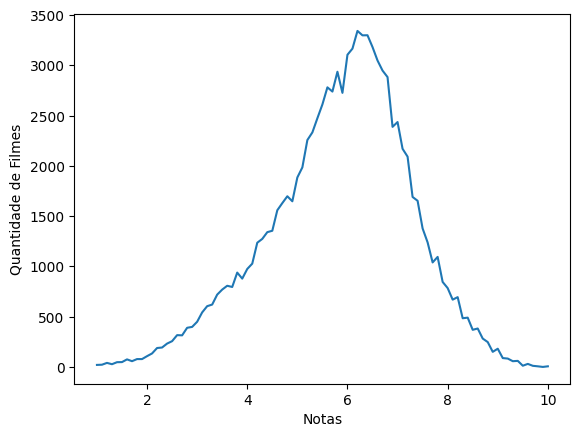

In [125]:
# Visualizando a dispersão de dados
plt.clf()
plt.plot(list_x_notas, list_y_quantidade)
plt.xlabel("Notas")
plt.ylabel("Quantidade de Filmes")